In [480]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (ggong@kasi.re.kr)
# @Date: 2023-10-06
# @Filename: hw3.ipynb

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys

In [481]:
class handling_txts:
    """handling the txt file"""

    def __init__(self, file_name: str):
        self.file_name = file_name
        self.file = open(file_name, 'r')
        #print(self.file_name)

    def rd_savetolist(self):

        self.value_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            val = float(line)
            self.value_list.append(val)

        return self.value_list

    def rd_savetolist_abc(self):

        self.first_list = []
        self.second_list = []
        self.third_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            item = line.split(" ")
            first_val = float(item[0])
            self.first_list.append(first_val)
            second_val = float(item[1])
            self.second_list.append(second_val)
            third_val = float(item[2])
            self.third_list.append(third_val)

        return self.first_list, self.second_list, self.third_list

    def rd_ln(self):

        list_len = len(self.value_list)
        return list_len


In [482]:
# Then calculate the following for each dataset:

"""
1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis
"""

class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

    def skewness(self):
        # sum((val - self.mean)**3)/self.num
        # StandardDeviation**(3)
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**3
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**3
        self.skewness = top_comp / under_comp

        return self.skewness

    def kurtosis(self):
        # sum((val - self.mean)**4)/self.num
        # StandardDeviation**4
        
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**4
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**4
        self.kurtosis = top_comp / under_comp

        return self.kurtosis



In [483]:
# call the mock datas

mk_f = handling_txts("regression_data_f.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)


1.457882325642531


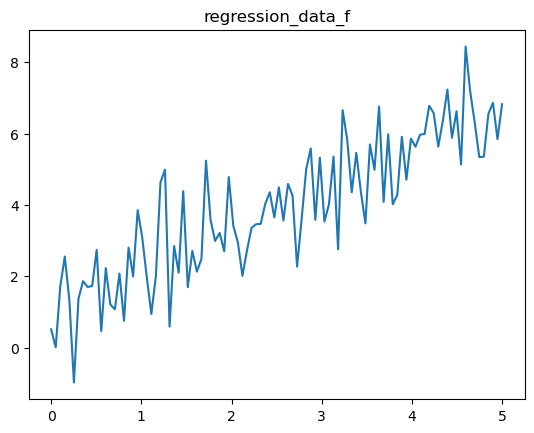

In [484]:
plt.figure()
plt.plot(data_f_x, data_f_y)
plt.title("regression_data_f")
plt.show()

In [485]:
a_list = list(range(-10, 11))
#a_list = [1]
#a_list.remove(0)
b_list = list(range(-10, 11))
#b_list = [-1, 0, 1] # data 모양이 linear에 가깝기때문
#b_list.remove(0)
print(a_list)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [486]:
def model_fun(a, b, x_list):
    model1 = []
    for x in x_list:
        if x == 0:
            model1_val = 1
        else:
            model1_val = (a*x)+(x**b)+1
        model1.append(model1_val)

    print(f"model = {a}*x + x**{b} + 1")

    return model1


#model1 = []
#for a in a_1:
#    for b in b_1:
#        model1 = model(a, b, data_f_x)

models = []
ab_list = []
for a in a_list:
    for b in b_list:
        model = model_fun(a, b, data_f_x)
        ab = [a, b]
        ab_list.append(ab)
        models.append(model)

print(len(models))
print(ab_list)

model = -10*x + x**-10 + 1
model = -10*x + x**-9 + 1
model = -10*x + x**-8 + 1
model = -10*x + x**-7 + 1
model = -10*x + x**-6 + 1
model = -10*x + x**-5 + 1
model = -10*x + x**-4 + 1
model = -10*x + x**-3 + 1
model = -10*x + x**-2 + 1
model = -10*x + x**-1 + 1
model = -10*x + x**0 + 1
model = -10*x + x**1 + 1
model = -10*x + x**2 + 1
model = -10*x + x**3 + 1
model = -10*x + x**4 + 1
model = -10*x + x**5 + 1
model = -10*x + x**6 + 1
model = -10*x + x**7 + 1
model = -10*x + x**8 + 1
model = -10*x + x**9 + 1
model = -10*x + x**10 + 1
model = -9*x + x**-10 + 1
model = -9*x + x**-9 + 1
model = -9*x + x**-8 + 1
model = -9*x + x**-7 + 1
model = -9*x + x**-6 + 1
model = -9*x + x**-5 + 1
model = -9*x + x**-4 + 1
model = -9*x + x**-3 + 1
model = -9*x + x**-2 + 1
model = -9*x + x**-1 + 1
model = -9*x + x**0 + 1
model = -9*x + x**1 + 1
model = -9*x + x**2 + 1
model = -9*x + x**3 + 1
model = -9*x + x**4 + 1
model = -9*x + x**5 + 1
model = -9*x + x**6 + 1
model = -9*x + x**7 + 1
model = -9*x + x**8 

In [487]:
print(models)

[[1, 9260872448090.654, 9043820750.077946, 156833687.57592803, 8831855.181055838, 948311.8134319063, 153155.86822341455, 32782.18642607146, 8621.819167500473, 2652.4468245969465, 922.0367397585101, 352.4911671068443, 144.50765421912524, 61.61099917662321, 25.945622792190207, 9.484012084768976, 1.3419063445248067, -2.992157957088037, -5.4971666308090885, -7.085476417555368, -8.196628026001298, -9.050848463948007, -9.76243267101111, -10.392612198728681, -10.975149367032696, -11.52915534038134, -12.065710928439811, -12.591384173897845, -13.110148194282406, -13.624452016980136, -14.135831782706044, -14.645266787803813, -15.153390854560172, -15.660620049066669, -16.167231135946885, -16.673410521257445, -17.17928523019699, -17.68494278274996, -18.19044411069028, -18.695832054406022, -19.20113701640008, -19.706380763875835, -20.21157901276368, -20.716743200871267, -21.221881715933062, -21.727000753663344, -22.23210492234527, -22.737197672255274, -23.242281603015865, -23.747358685193554, -24.2

In [488]:
#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2
        sum = sum + Chi_squared

    chi_final = sum/x_sigma**2
    chis.append(chi_final)
    #print(sum)

print(chis)
print(min(chis))
#print(sums)

[4.035146229482239e+25, 1.0292719578204622e+23, 2.6254559697560243e+20, 6.697216231150725e+17, 1708614976531826.0, 4361529437711.5903, 11159570179.908556, 28890434.524769753, 126584.29231672599, 48367.395519155434, 46516.5505542977, 40697.28279225303, 21936.158357379612, 23608.51619700226, 1606277.2743587503, 41335794.3341189, 922841615.2691758, 20375620241.253155, 454731285227.3677, 10275438611395.473, 234714965225795.84, 4.035146229482284e+25, 1.0292719578206855e+23, 2.625455969767345e+20, 6.697216231727466e+17, 1708614979492763.0, 4361529585844.533, 11159570560.880478, 28882638.758548163, 118281.87085745858, 40061.66923222794, 38352.91377232071, 33086.517297404724, 16507.57108035311, 27150.42394927667, 1647880.8650469952, 41542763.19834753, 923780153.2439595, 20379841421.399994, 454750404611.81116, 10275525979224.742, 234715367677109.1, 4.035146229482328e+25, 1.0292719578209086e+23, 2.6254559697786644e+20, 6.697216232304216e+17, 1708614982454491.0, 4361529734765.6045, 11159571729.97

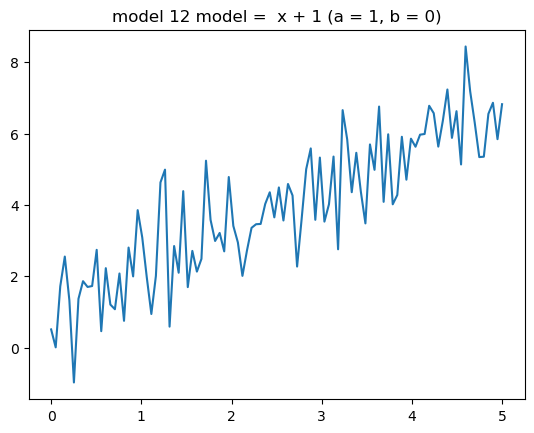

In [489]:
plt.figure()
plt.plot(data_f_x, data_f_y)
#plt.plot(data_f_x, models[11])
plt.title("model 12 model =  x + 1 (a = 1, b = 0)")
plt.show()